In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/stocks_quarterly.csv')

In [5]:
df.head(30)

,fiscalDateEnding,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,...,surprisePercentage,price,nasd_price,next_year_date,next_year_price,nasd_ny_price,symbol,Nasdaq_Performance,Stock_Performance,Label
0,2020-12-31,4.027000e+09,4.027000e+09,4.485000e+09,1.240000e+09,-2.515000e+09,1.860000e+08,NaN,1.127000e+09,5000000.0,...,6.3380,18.100000,13337.160156,2022-01-28,15.640000,13770.570313,AAL,3.249643,-13.591160,0
1,2020-09-30,-2.310000e+09,2.833000e+09,5.143000e+09,1.156000e+09,-2.871000e+09,7.000000e+07,NaN,1.941000e+09,5000000.0,...,3.7309,13.150000,11506.009766,2021-10-22,19.150000,15090.200195,AAL,31.150594,45.627378,1
2,2020-06-30,-2.601000e+09,1.368000e+09,3.969000e+09,8.660000e+08,-2.486000e+09,4.300000e+07,NaN,1.133000e+09,10000000.0,...,0.9575,11.770000,10461.419922,2021-07-23,21.200001,14836.990234,AAL,41.825778,80.118946,1
3,2020-03-31,1.241000e+09,8.258000e+09,7.017000e+09,2.197000e+09,-2.549000e+09,3.050000e+08,NaN,2.857000e+09,21000000.0,...,-12.5218,12.010000,8889.549805,2021-04-30,21.719999,13962.679688,AAL,57.068468,80.849283,1
4,2019-12-31,1.118900e+10,1.131300e+10,1.240000e+08,2.633000e+09,7.290000e+08,5.030000e+08,NaN,1.240000e+08,24000000.0,...,-0.5104,28.799999,9402.480469,2021-01-22,15.820000,13543.059570,AAL,44.037093,-45.069444,0
5,2019-09-30,4.329000e+09,1.162700e+10,7.298000e+09,2.854000e+09,8.080000e+08,4.240000e+08,NaN,2.508000e+09,34000000.0,...,1.6100,29.410000,8185.799805,2020-10-23,12.600000,11548.280273,AAL,41.076994,-57.157428,0
6,2019-06-30,4.615000e+09,1.168500e+10,7.070000e+09,2.864000e+09,1.153000e+09,4.010000e+08,NaN,2.277000e+09,35000000.0,...,1.7726,31.670000,8238.540039,2020-07-24,11.390000,10363.179688,AAL,25.789031,-64.035364,0
7,2018-12-31,1.071100e+10,1.093800e+10,2.270000e+08,2.748000e+09,5.710000e+08,4.720000e+08,NaN,2.270000e+08,34000000.0,...,3.4106,33.660000,7073.459961,2020-01-24,27.639999,9314.910156,AAL,31.688173,-17.884731,0
8,2018-09-30,4.077000e+09,1.129400e+10,7.217000e+09,3.043000e+09,6.850000e+08,3.950000e+08,NaN,2.341000e+09,29000000.0,...,0.4177,32.369999,7318.339844,2019-10-25,30.860001,8243.120117,AAL,12.636476,-4.664808,0
9,2018-06-30,4.369000e+09,1.137700e+10,7.008000e+09,2.898000e+09,1.004000e+09,3.478000e+09,NaN,5.441000e+09,30000000.0,...,2.4706,40.020000,7852.180176,2019-07-26,31.240000,8330.209961,AAL,6.087861,-21.939032,0


### Drop columns with more tha 15% of nan's

In [6]:
cols_to_drop = df.isnull().mean().sort_values(ascending = False).head(45).index

In [7]:
df.drop(columns = cols_to_drop, inplace = True)

In [8]:
df = df.drop(columns = ['fiscalDateEnding','reportedDate','price','nasd_price','next_year_date','next_year_price','nasd_ny_price','symbol','Nasdaq_Performance', 'Stock_Performance'])

### Class balance

In [9]:
df.Label.value_counts()

0    5241
1    2646
Name: Label, dtype: int64

### DF info

In [10]:
df.describe()

,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,operatingExpenses,interestExpense,depreciationAndAmortization,incomeBeforeTax,...,cashflowFromInvestment,cashflowFromFinancing,proceedsFromRepurchaseOfEquity,changeInCashAndCashEquivalents,netIncome_y,reportedEPS,estimatedEPS,surprise,surprisePercentage,Label
count,7.772000e+03,7.638000e+03,7.752000e+03,6.907000e+03,7.813000e+03,7.830000e+03,7.844000e+03,7.193000e+03,7.035000e+03,7.837000e+03,...,7.585000e+03,7.781000e+03,7.190000e+03,6.932000e+03,7.887000e+03,7871.000000,7119.000000,7119.000000,6889.000000,7887.000000
mean,1.622322e+10,3.836244e+10,7.206397e+12,8.087876e+12,9.167430e+09,4.344218e+09,6.536604e+09,4.188294e+09,4.257977e+08,8.973883e+09,...,-8.199372e+09,-1.258557e+09,-2.554103e+09,8.601305e+07,5.573161e+09,-0.297182,-0.348260,0.034006,-11.599179,0.335489
std,3.393901e+11,7.029453e+11,6.327849e+14,6.703757e+14,2.035235e+11,8.010803e+10,3.386146e+11,7.849513e+10,2.749291e+10,1.864010e+11,...,1.848898e+11,2.945391e+11,1.218704e+11,1.591850e+09,1.336809e+11,27.407988,28.054589,7.479925,836.515632,0.472191
min,-6.043858e+12,-2.037500e+10,-2.550465e+09,-6.574000e+09,-2.326840e+11,-1.341003e+12,-2.038564e+13,-6.659900e+11,-3.897000e+08,-2.326840e+11,...,-9.383569e+12,-8.785617e+12,-9.270262e+12,-3.304200e+10,-2.662320e+11,-1920.000000,-1720.000000,-413.333300,-24700.000000,0.000000
25%,2.871310e+06,1.770725e+07,8.646250e+06,7.121000e+06,-5.651070e+06,4.329250e+06,8.490000e+06,2.540000e+05,4.260000e+05,-5.017000e+06,...,-8.295600e+07,-3.066100e+07,-1.233975e+06,-7.917750e+06,-5.143000e+06,-0.090000,-0.068900,-0.029800,-8.571400,0.000000
50%,4.188100e+07,1.225620e+08,6.079300e+07,6.015500e+07,4.422696e+06,2.125150e+07,4.090150e+07,3.959000e+06,2.800000e+06,5.436000e+06,...,-7.597000e+06,-2.800000e+04,0.000000e+00,6.467340e+05,4.074000e+06,0.250000,0.256100,0.020000,4.249400,0.000000
75%,2.768612e+08,8.051500e+08,3.909760e+08,3.823520e+08,6.867100e+07,1.060322e+08,2.076602e+08,2.304300e+07,2.166800e+07,6.170000e+07,...,-4.100000e+04,1.605600e+07,7.120000e+05,3.225725e+07,4.896100e+07,0.670000,0.640000,0.088900,21.080600,1.000000
max,1.040561e+13,1.922251e+13,5.571384e+16,5.571384e+16,6.451797e+12,1.743446e+12,1.235200e+13,1.651385e+12,2.299000e+12,5.860137e+12,...,4.235170e+11,1.281750e+13,1.460700e+10,8.977900e+10,6.825309e+12,121.512700,44.430200,380.000000,44566.666700,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7887 entries, 0 to 7886
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   grossProfit                            7772 non-null   float64
 1   totalRevenue                           7638 non-null   float64
 2   costOfRevenue                          7752 non-null   float64
 3   costofGoodsAndServicesSold             6907 non-null   float64
 4   operatingIncome                        7813 non-null   float64
 5   sellingGeneralAndAdministrative        7830 non-null   float64
 6   operatingExpenses                      7844 non-null   float64
 7   interestExpense                        7193 non-null   float64
 8   depreciationAndAmortization            7035 non-null   float64
 9   incomeBeforeTax                        7837 non-null   float64
 10  incomeTaxExpense                       6924 non-null   float64
 11  netI

### Baseline Model

In [13]:
df = df.fillna(0)

In [14]:
X = df.drop(columns = 'Label')
y = df.Label

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(solver='liblinear')

cv = cross_validate(model,X,y, scoring = 'accuracy')

/Users/patriciogarbino/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
cv['test_score'].mean()

0.5312580319275904

In [17]:
1815/5387


0.33692222015964357

/Users/patriciogarbino/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


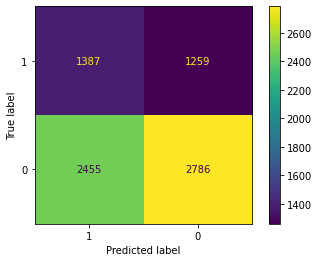

In [25]:
from sklearn.metrics import plot_confusion_matrix

model.fit(X,y)

plot_confusion_matrix(model, X, y,labels=[1,0])

plt.show()

In [21]:
df['Label'].value_counts()

0    5241
1    2646
Name: Label, dtype: int64

In [26]:
1387+1259

2646